In [3]:
import matplotlib.pyplot as plt
import pickle
import numpy as np


f = open('NoBombADCTutorial.pickle', 'rb')


data = pickle.load(f)



In [4]:
print(data['order'])

['serverRecal', 'validationThreshold', 'detectionWindow', 'totalNodes']


In [5]:
lines = {}
for k in [200, 500, 1000, 2000, 5000, 10000]:
    line = []
    for i in range(0, 5):
        line.append(('true', i, 100, k))
    lines['ServerRecal %s' % k] = line
    
a = [list(lines.keys()), list(lines.keys())]
a = []
for v in lines.keys():
    a.append([v, lines[v]])
a.sort(key=lambda x: int(x[0].split(" ")[1]))



dict_keys(['ServerRecal 10000', 'ServerRecal 500', 'ServerRecal 2000', 'ServerRecal 200', 'ServerRecal 5000', 'ServerRecal 1000'])


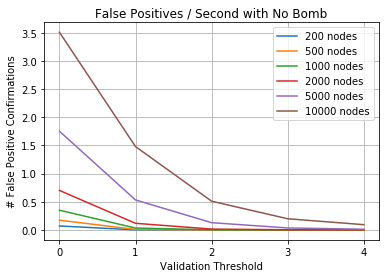

In [10]:
title = 'False Positives / Second with No Bomb'
for name, line in a:
    pts = []
    for val in lines[name]:
        total = 0.0
        cnt = 0
        passed = 0
        for run in data['data'][val]:
            if run['Detection Time'] <= 20000:
                total += run['# False Positive Confirmations']
                #total += run['# False Positive Confirmations']
                cnt += 1
            else:
                passed += 1
        pts.append((total/cnt)/10000.0)
    plt.plot(pts)
plt.xticks([0, 1, 2, 3, 4])
plt.xlabel('Validation Threshold')
plt.ylabel('# False Positive Confirmations')
plt.grid(True)
print(lines.keys())
plt.legend(["%d nodes" % int(x[0].split(' ')[-1]) for x in a])
plt.title('%s' % title)


plt.show()